In [2]:
# jupyter nbconvert --to python test_software_dev_version.ipynb test_software_dev_version.py
%reset -f
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os 
from pathlib import Path, PureWindowsPath

import pickle
import time
from scipy.optimize import curve_fit

import  matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import clear_output


import sys


import Alpaga # the full package
importlib.reload(Alpaga) # to make sure you have the good version
from Alpaga import alpaga as alpaga # The code that actually have the function

# Initialisation Data

In [4]:
WORK_DIR = '/data/glebreton/Documents/Rapport/HRS/Data/Experiences/Eau_V_Spectres'

In [3]:
print(os.sep)

/


In [8]:
#Chemin a décomposer sinon problème avec \x
WORK_DIR = os.path.join ('C:' , os.sep, 'Users\Fabien\Documents\These\Manip')
directory_day1 = os.path.join(WORK_DIR, '2021')
directory_day1 = os.path.join(directory_day1, 'Octobre2021')
directory_day = os.path.join(directory_day1, '1110')
WORK_DIR = os.path.join(directory_day, 'Polar_water_200mW')
#directory = os.path.join(directory_day, 'POLARH_JL29_2_c5600_490mw_10s_Spectres')
print (WORK_DIR)
print (directory_day)
#print (directory)

SAVE_DIR = os.path.join ('C:' , os.sep, 'Users\Fabien\Documents\These\Collaboration_Doru_Episode2\Traitement_Polar_Alpaga\JL66AG')

C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110


In [6]:
def analyse_HRS_3e(prefixe, angle=False, iteration=False, extention='.dat'):
    '''
    Define how to built the name of a file. 
    Please note that the function structure / argument / output should be exactly like that!!!!
    '''
    if isinstance(angle, bool): # case where no angle is given 
        if isinstance(iteration, bool): # case where no iteration is given 
            name = prefixe + extention
        else: # case where an iteration is given 
            name = prefixe + '_acq' + iteration + extention
    else: # case where an angle is given 
        if isinstance(iteration, bool):  # case where no iteration is given 
            name = prefixe + '_' + angle + extention
        else:  # case where an iteration is given 
            name = prefixe + '_' + angle + '_acq' + iteration + extention
    return(name)
    
name_out = analyse_HRS_3e('Spectre_Polar_200mW_H_30s_water', angle='42.0', iteration='4', extention='.dat')

print(name_out)


Spectre_Polar_200mW_H_30s_water_42.0_acq4.dat


# Cleaning and averaging

C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0
The averaging will be done for iter from 1 to 10
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0_acq1.dat
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0_acq2.dat
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0_acq3.dat
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0_acq4.dat
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0_acq5.dat
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V_30s_water_0.0_acq6.dat
C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Spectre_Polar_200mW_V

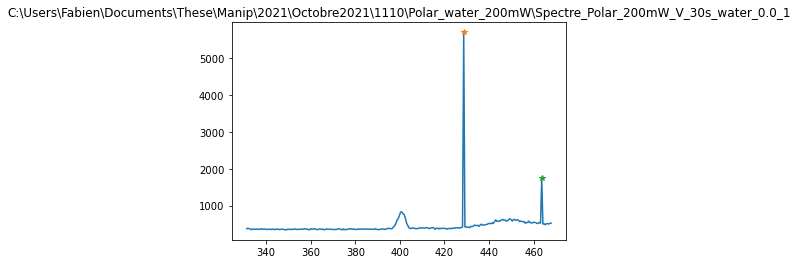

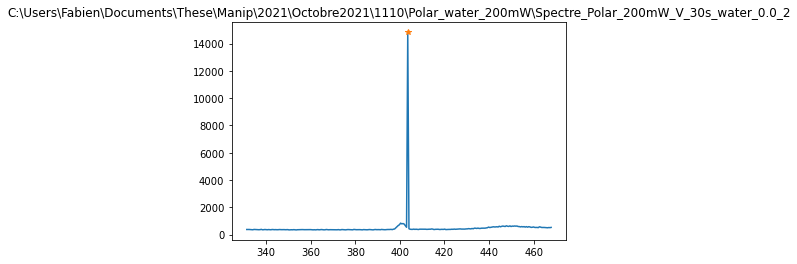

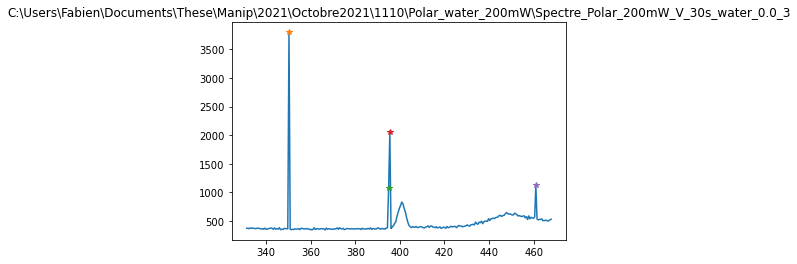

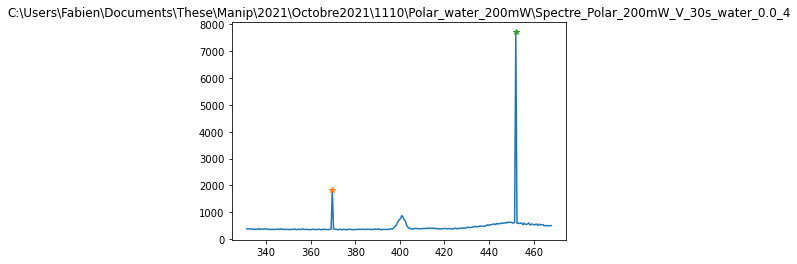

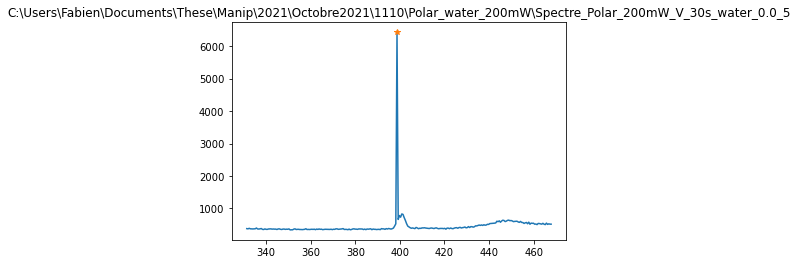

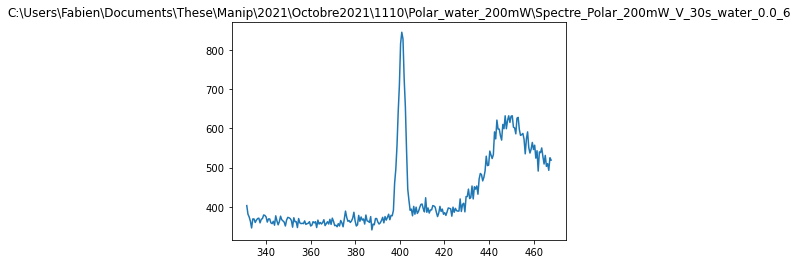

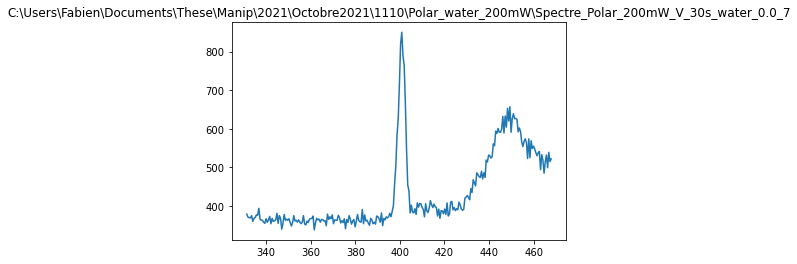

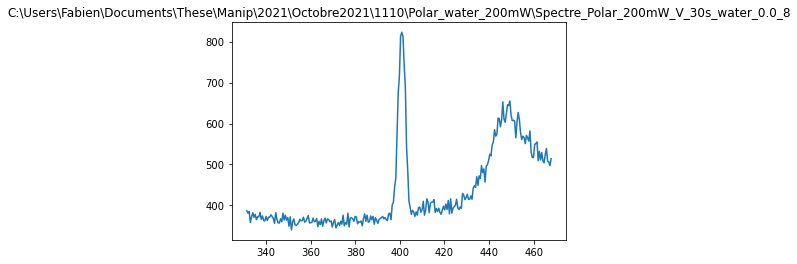

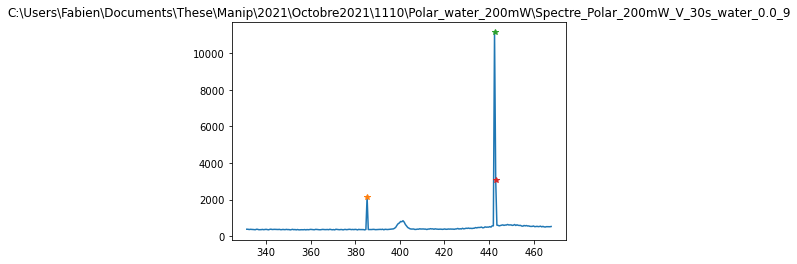

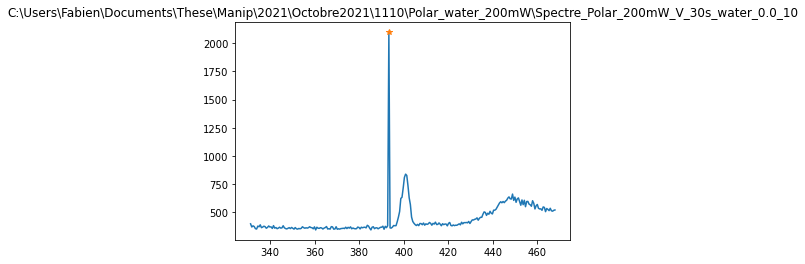

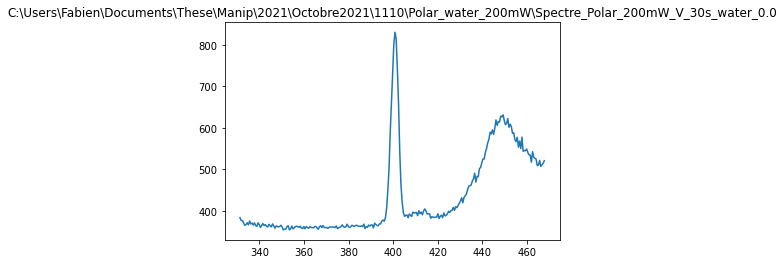

In [16]:
#directory = os.path.join(WORK_DIR, 'Eau_polar_V')
#prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

prefix_file = 'Spectre_Polar_200mW_V_30s_water_0.0' 
names = os.path.join(WORK_DIR, prefix_file)
#C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar water 200mW
print (names)
N_iter = 10
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names, N_iter, extention='.dat', fct_name=my_own_name_file, type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', figure_counter=1)


# Noise and Fit

Intensity: 450.1223360915619  Lambda: 400.76704365730177  Omega:  2.2182261170125908


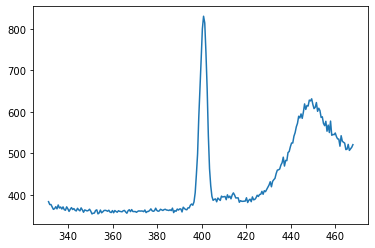

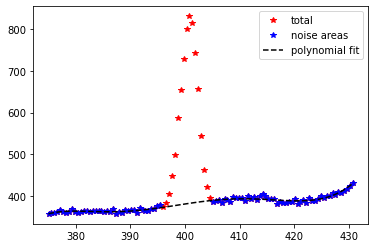

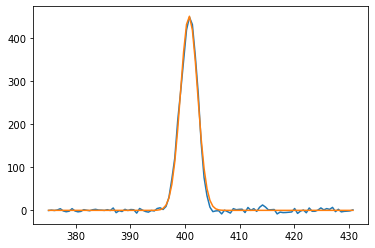

In [17]:
# To check how the noise is removed:


#prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)
#names = os.path.join(directory, prefix_file) + '_' + L_files_angles[10]
names2 =  names + "_acq"
N_iter = 10
#L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names2, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra=False, figure_counter=1)

# Cut set
l_cut = [375, 396, 405, 431]
order_fit_noise = 6

# Fit the gaussian parameters:
bounds_fit_gausse = ([0, 396, 2], [np.inf, 405, 3])

intensity, lambda_0, omega, figure_counter = alpaga.fit_gaussian_from_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, bounds_fit_gausse=bounds_fit_gausse, show_spectra='all')
print('Intensity:',intensity,' Lambda:',lambda_0, ' Omega: ', omega)




# POLAR

In [14]:
#Initialisation
directory = False
prefix_file = 'Spectre'
prefix_file = os.path.join(WORK_DIR, prefix_file)
L_files_angles = [str(float(x*4)) for x in range(1, 4, 1)] # list string parcours angle
N_iter = 3 
extention = '.dat'
fct_name = analyse_HRS_3e

# Cleaning parameters:
type_cleaning='mean' # default
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

# Cut set
l_cut = [375, 396, 405, 431]
order_fit_noise = 2

# how to remove the noise for the second round
automatic_l_cut = True
l_cut_n_n2 = [2, 9]

# Fit the gaussian parameters:
lambda_0_ref = 400 # useless if you use method_fit_first='fit_gauss'
waist_ref = 2.0
bounds_fit_gausse = ([0, 396, 2], [np.inf, 405, 3])

method_fit_first='fit_gauss' # 'integral_gauss' or 'fit_gauss'
fixed_para_gauss_fit = True
method_fit_second = 'fit_gauss' # or integral_gauss' or 'fit_gauss' or 'both'

# Saving the results:
save_result=True
name_save_result = os.path.join(WORK_DIR,'results.p')


waiting_time = False #False or a float
L_post_prod_gauss_fit_integral = alpaga.polarisation_intensity(directory=directory, prefix_file=prefix_file, L_files_angles=L_files_angles, N_iter=N_iter, extention=extention, fct_name=fct_name, type_cleaning=type_cleaning, L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, automatic_l_cut=automatic_l_cut, l_cut=l_cut, l_cut_n_n2=l_cut_n_n2, order_fit_noise=order_fit_noise, method_fit_first=method_fit_first, bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, fixed_para_gauss_fit=fixed_para_gauss_fit, method_fit_second=method_fit_second, save_result=save_result, name_save_result=name_save_result, waiting_time=waiting_time)


OSError: /data/glebreton/Documents/Rapport/HRS/Data/Experiences/Eau_V_Spectres/Spectre_4.0_acq1.dat not found.

# Load and Plot

In [19]:
#WORK_DIR = os.path.join ('C:' , os.sep, 'Users\Fabien\Documents\These\Manip\mars2021')
#directory_day = os.path.join(WORK_DIR, '0323')
#directory = os.path.join(directory_day, 'POLARV_JL66AG0c10_500mw_5s_Spectres')


#name_save_result = os.path.join(directory_day,'Patate_test.p')
#name_save_result = os.path.join(PLOT_DIR,'patate.txt')
name_save_result = os.path.join(WORK_DIR,'Polar_200mW_V_30s_water.p')


print(name_save_result)
#name_save_result = os.path.abspath(name_save_result)
#name_save_result = name_save_result.replace('\\','/')
#name_save_result =  PureWindowsPath(name_save_result)
#name_save_result = Path(name_save_result)

#name_save_result = 'C:/Users/Fabien/Documents/These/Collaboration_Doru_Episode2/Traitement_Polar_Alpaga/Patate.p'

#Pour utiliser open
name_save_result = name_save_result.replace(os.sep,'/')
print(os.sep)

print(name_save_result)
with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2

L_intensity_angle = L_post_prod_load['L_intensity_angle']
L_lambda_0_angle = L_post_prod_load['L_lambda_0_angle']
L_waist_angle = L_post_prod_load['L_waist_angle']
L_intensity_angle_fit_gauss_fixed_para = L_post_prod_load['L_intensity_angle_fit_gauss_fixed_para']
#L_intensity_angle_integral_gauss_fixed_para = L_post_prod_load['L_intensity_angle_integral_gauss_fixed_para']


#SAVE_DIR = '/home/lama/where_you_want_to_save_your_plots'
#SAVE_DIR = 'C:/Users/Fabien/Documents/These/Collaboration_Doru_Episode2/Traitement_Polar_Alpaga/'

C:\Users\Fabien\Documents\These\Manip\2021\Octobre2021\1110\Polar_water_200mW\Polar_200mW_V_30s_water.p
\
C:/Users/Fabien/Documents/These/Manip/2021/Octobre2021/1110/Polar_water_200mW/Polar_200mW_V_30s_water.p


# Check

Text(0.5, 1.0, '$\\omega_0$ fit parameter found for every polarisation angle')

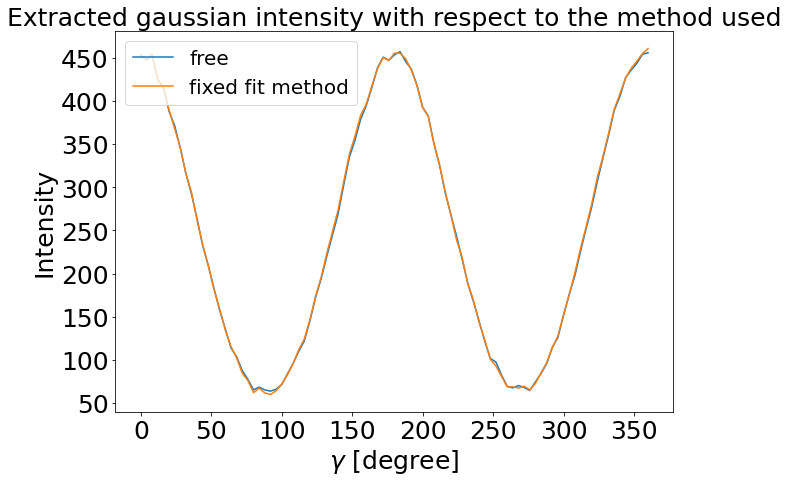

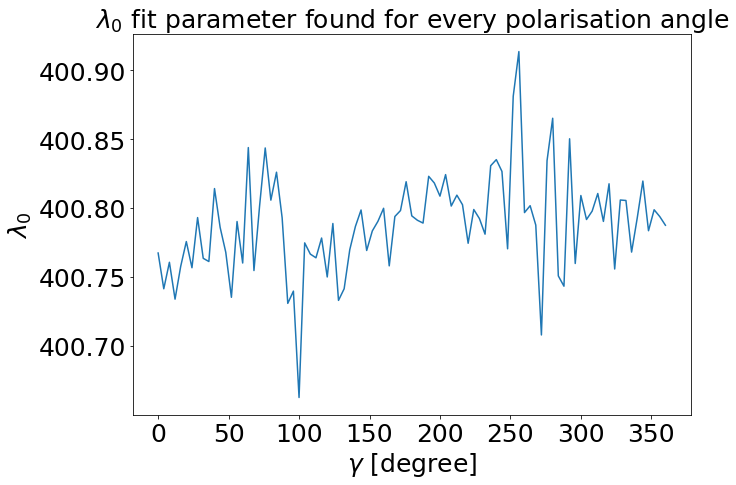

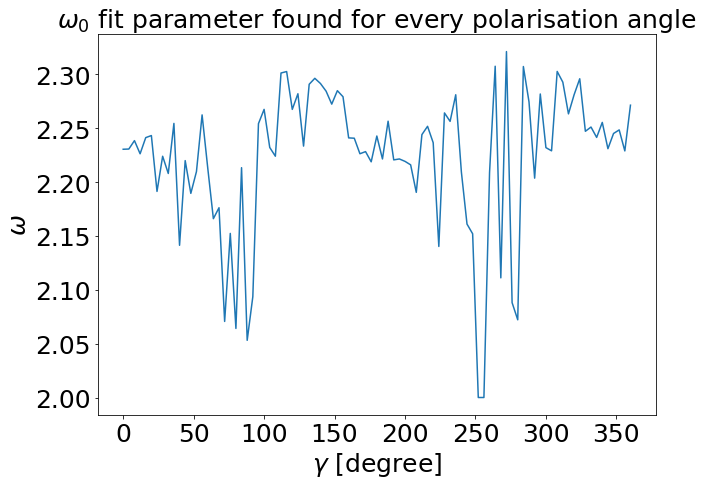

In [20]:
# Fit Method
plt.figure(1, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity_angle, label='free')
plt.plot(L_polarisation_angle, L_intensity_angle_fit_gauss_fixed_para, label='fixed fit method')
#plt.plot(L_polarisation_angle, L_intensity_angle_integral_gauss_fixed_para, label='fixed integral method')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=25)

# Lambda0
plt.figure(2, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_lambda_0_angle)
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'$\lambda_0$', fontsize=25)
plt.yticks(fontsize=25)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=25)

# Omega0
plt.figure(3, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_waist_angle)
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'$\omega$', fontsize=25)
plt.yticks(fontsize=25)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=25)

# Polar Plot

a= 454.68582973537013 b= 427.32409491842077 c= 63.634166150446866 alpha_0= -9.999999999999999e-05
Zeta = -0.21294352939486832 D = 0.13995194481315226
i0= 247.77414606558918 i2/i0= 0.0015922515626219868 i4/i0= 0.0001849060797395926 i4= 0.0458149460098133


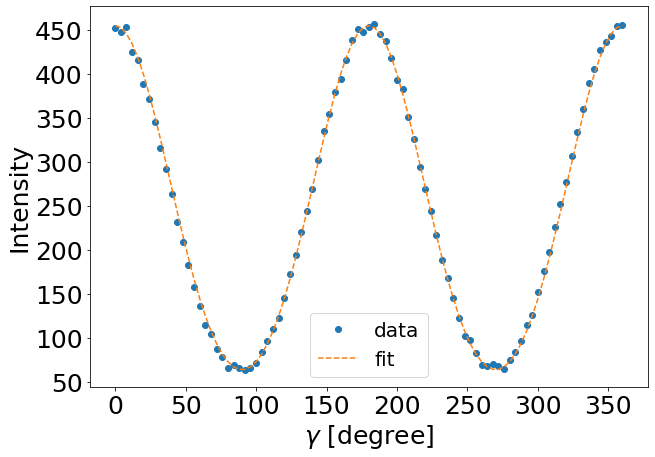

In [21]:
L_x = L_polarisation_angle
T = 1 # Acquisition time if you want to renormalize
L_y = L_intensity_angle/T # chose which method you want to have the intensity

a, b, c, alpha_0 , Zeta, Depol, i0, i2, i4 = alpaga.analyse_polarization_HRS(L_x, L_y, alpha_0=0)
print('a=', a, 'b=' ,b, 'c=', c, 'alpha_0=', alpha_0)
print('Zeta = ' + str(Zeta), 'D = ' + str(Depol))
print('i0=', i0, 'i2/i0=', i2/i0, 'i4/i0=', i4/i0, 'i4=',i4)


plt.figure(1, figsize=(10, 7))
plt.plot(L_x, L_y , 'o', label='data')
plt.plot(L_x, alpaga.fct_polar_abc(L_x, a, b, c, alpha_0), '--', label='fit')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)

textstr = '\n'.join((
    r'D=%.3f' % (Depol, ),
    r'ZetaV=%.3f' % (Zeta, ),
    r'i4=%.3f' % (i4, )))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='none', alpha=0.2)
#plt.text(50, 3100, textstr, bbox=props,fontsize=15)

#plt.title('POLARV_JL66AG30c10_500mw_5s', fontsize=25)


# I4

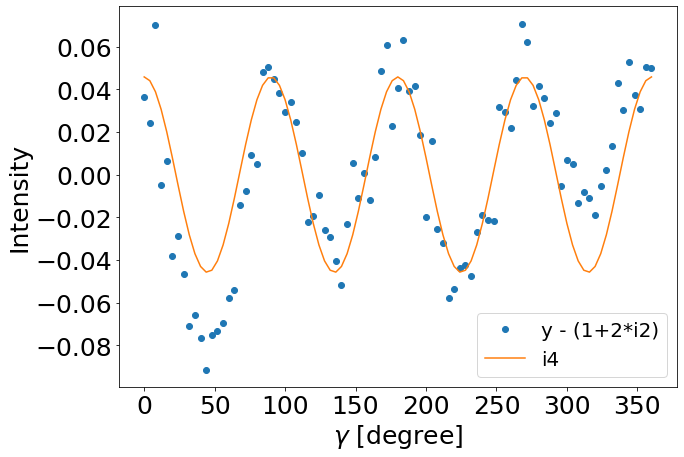

In [22]:
plt.figure(2, figsize=(10, 7))
#plt.plot(L_x, L_y/i0 - 1 , 'o', label='y - 1')
plt.plot(L_x, L_y/i0 - (1+2*i2*np.cos(2*np.pi/180*(L_x-alpha_0))) , 'o', label='y - (1+2*i2)')
plt.plot(L_x, i4*np.cos(4*np.pi/180*(L_x-alpha_0)) , label='i4')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
#plt.title(name_for_title, fontsize=25)

# Plot V et H

C:/Users/Fabien/Documents/These/Manip/2021/Octobre2021/1110/Polar_water_200mW/Polar_200mW_V_30s_water.p
C:/Users/Fabien/Documents/These/Manip/2021/Octobre2021/1110/Polar_water_200mW/Polar_200mW_H_30s_water.p
aV= 454.7582930549194 bV= 427.30814056247664 cV= 63.56737885065026 alphaV_0= -0.7586935218950415
aH= 40.04758541728729 bH= 73.61225968195868 cH= 34.13134567555351 alphaH_0= -11.417770156194003
ZetaV = -0.2130021001314984 D = 0.13978278092220184
ZetaH = 0.0797563358567291


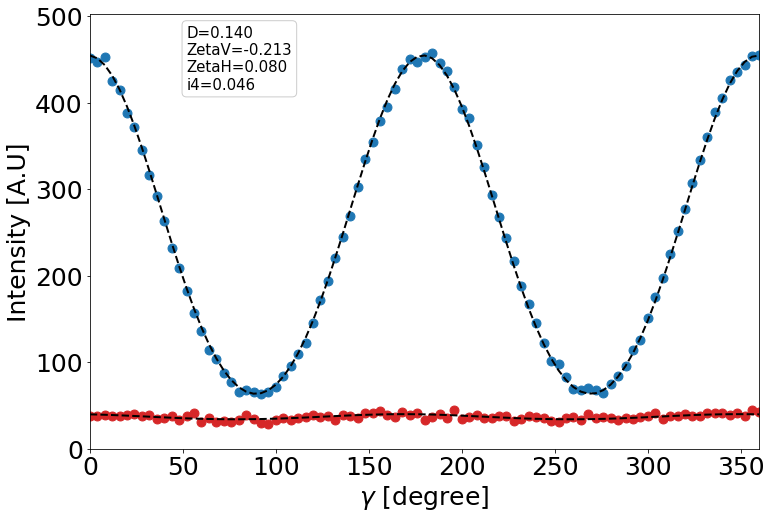

In [36]:
#print(SAVE_DIR)

#DataV
name_save_resultV = os.path.join(WORK_DIR,'Polar_200mW_V_30s_water.p')
name_save_resultV = name_save_resultV.replace(os.sep,'/')
print(name_save_resultV )

#DataH
name_save_resultH = os.path.join(WORK_DIR,'Polar_200mW_H_30s_water.p')
name_save_resultH = name_save_resultH.replace(os.sep,'/')
print(name_save_resultH )

#POLAR V
with open(name_save_resultV, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2

L_intensity_angle = L_post_prod_load['L_intensity_angle']
#L_intensity_angle_fit_gauss_fixed_para = L_post_prod_load['L_intensity_angle_fit_gauss_fixed_para']
#L_intensity_angle_integral_gauss_fixed_para = L_post_prod_load['L_intensity_angle_integral_gauss_fixed_para']



LV_x = L_polarisation_angle
T = 1 # Acquisition time if you want to renormalize
LV_y = L_intensity_angle/T # chose which method you want to have the intensity
a, b, c, alpha_0 , Zeta, Depol, i0, i2, i4 = alpaga.analyse_polarization_HRS(LV_x, LV_y)

#POLAR H

with open(name_save_resultH, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)
L_intensity_angle = L_post_prod_load['L_intensity_angle']
LH_y = L_intensity_angle/T
aH, bH, cH, alphaH_0 , ZetaH, DepolH, i0H, i2H, i4H = alpaga.analyse_polarization_HRS(LV_x, LH_y)
ZetaH=(aH-cH)/(aH+cH)

#Print
print('aV=', a, 'bV=' ,b, 'cV=', c, 'alphaV_0=', alpha_0)
#print('i0=', i0, 'i2/i0=', i2/i0, 'i4/i0=', i4/i0, 'i4=',i4)
print('aH=', aH, 'bH=' ,bH, 'cH=', cH, 'alphaH_0=', alphaH_0)
print('ZetaV = ' + str(Zeta), 'D = ' + str(Depol))
print('ZetaH =', ZetaH)

#Plot
plt.figure(1, figsize=(12, 8))
plt.axis([0, 360, min(LV_y)-min(LV_y), max(LV_y)+max(LV_y)/10])
#plt.axis([0, 360, min(LV_y)-min(LV_y)/5, 2500])

plt.scatter(LV_x, LV_y , s=80,  color='tab:blue')
plt.plot(LV_x, alpaga.fct_polar_abc(LV_x, a, b, c, alpha_0), '--', linewidth=2, color='black')


plt.scatter(LV_x, LH_y, s=80,  color='tab:red')
plt.plot(LV_x, alpaga.fct_polar_abc(LV_x, aH, bH, cH, alphaH_0), '--', linewidth=2,  color='black')

plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity [A.U]', fontsize=25)
plt.yticks(fontsize=25)


textstr = '\n'.join((
    r'D=%.3f' % (Depol, ),
    r'ZetaV=%.3f' % (Zeta, ),
    r'ZetaH=%.3f' % (ZetaH, ),
    r'i4=%.3f' % (i4, ))
)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='none', alpha=0.2)

plt.text(52 ,max(LV_y)/1.1 , textstr, bbox=props,fontsize=15)
#plt.text(52 ,280 , textstr, bbox=props,fontsize=15)

SAVE_NAME = 'Polar_200mW_30s_water.pdf'
name_save_result = os.path.join(WORK_DIR,SAVE_NAME)
name_save_result = name_save_result.replace(os.sep,'/')
#plt.savefig(name_save_result)

#plt.title('Polar Eau', fontsize=25)
#plt.savefig('C:/Users/Fabien/Documents/These/Manip/mars2021/0322/POLAR_JL66AG30.png')

DATA TXT

In [66]:

import pandas as pd


df = pd.DataFrame({'Angle':LV_x,
                  'IntV':LV_y,
                  'PolarV':alpaga.fct_polar_abc(LV_x, a, b, c, alpha_0),
                  'IntH':LH_y,
                  'PolarH':alpaga.fct_polar_abc(LV_x, aH, bH, cH, alphaH_0),}
                  )

print(df)

name_save_txt = os.path.join(SAVE_DIR,'POLARV_JL66AG12h_c7eau_450mW_10s.txt')
name_save_txt = name_save_txt.replace(os.sep,'/')
df.to_csv(name_save_txt,sep=' ', index=False, header=True)

    Angle        IntV      PolarV        IntH      PolarH
0     0.0  409.041238  389.611912  409.041238  389.611912
1     4.0  393.413853  388.076372  393.413853  388.076372
2     8.0  379.880448  383.924463  379.880448  383.924463
3    12.0  396.326145  377.202022  396.326145  377.202022
4    16.0  407.479601  367.985913  407.479601  367.985913
..    ...         ...         ...         ...         ...
86  344.0  374.977038  369.689431  374.977038  369.689431
87  348.0  365.532279  378.497007  365.532279  378.497007
88  352.0  364.801273  384.795857  364.801273  384.795857
89  356.0  382.555497  388.514451  382.555497  388.514451
90  360.0  370.729131  389.611912  370.729131  389.611912

[91 rows x 5 columns]
